In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import squarify
import plotly.express as px
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
salaries_df = pd.read_csv("../input/analytics-industry-salaries-2022-india/Salary Dataset.csv")
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
2664,CRMnext,Data Analyst,3.0,New Delhi,"₹7,52,418/yr"
876,Not Applicable,Data Scientist,1.0,Bangalore,"₹8,02,609/yr"
2987,VMware,Data Engineer,5.0,Bangalore,"₹23,00,000/yr"
1369,Infosys,Data Scientist,18.0,Hyderabad,"₹5,83,334/yr"
2100,Rainman Consulting,Data Analyst,3.0,Bangalore,"₹35,403/mo"
1207,Samyak Software,Data Scientist,1.0,Pune,"₹61,907/mo"
1400,DXC Technology,Data Scientist,3.0,Hyderabad,"₹12,52,143/yr"
2649,GALYTIX,Data Analyst,3.0,New Delhi,"₹30,821/mo"
4042,CreditVidya,Machine Learning Engineer,2.0,Hyderabad,"₹15,81,030/yr"
1789,Atos-Syntel,Data Scientist,3.0,Mumbai,"₹8,75,733/yr"


In [3]:
salaries_df.shape

(4344, 5)

In [4]:
salaries_df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary'], dtype='object')

In [5]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [6]:
salaries_df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [7]:
salaries_df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [8]:
salaries_df.duplicated().sum()

0

In [9]:
salaries_df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [10]:
salaries_df["Company Name"].nunique()

2529

In [11]:
salaries_df["Company Name"]

0                        Mu Sigma
1                             IBM
2       Tata Consultancy Services
3                Impact Analytics
4                       Accenture
                  ...            
4339                      TaiyōAI
4340      Decimal Point Analytics
4341                       MyWays
4342    Market Pulse Technologies
4343                      vPhrase
Name: Company Name, Length: 4344, dtype: object

In [12]:
salaries_df["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [13]:
salaries_df["Salary"].unique()

array(['₹6,48,573/yr', '₹11,91,950/yr', '₹8,36,874/yr', ...,
       '₹7,51,286/yr', '₹4,10,952/yr', '₹9,39,843/yr'], dtype=object)

In [14]:
salaries_df = salaries_df[salaries_df['Company Name'].notna()]
salaries_df = salaries_df[salaries_df['Salaries Reported'].notna()]
salaries_df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [15]:
salaries_cleaned = salaries_df.loc[salaries_df["Salary"].str.contains("AFN", case = False)]
salaries_cleaned

,Company Name,Job Title,Salaries Reported,Location,Salary
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr"


In [16]:
salaries_cleaned = salaries_cleaned["Salary"].str.slice(0, 3)
salaries_cleaned

2278    AFN
Name: Salary, dtype: object

In [17]:
salaries_df['currency'] = salaries_df["Salary"].str.slice(0, 1)
salaries_df['currency'].unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [18]:
salaries_df.loc[salaries_df["Salary"].str.contains("AFN", case = False)]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",A


In [19]:
salaries_df.at[2278, "currency"] = "AFN"
salaries_df.loc[salaries_df["Salary"].str.contains("AFN", case = False)]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN


In [20]:
salaries_df['working_duration'] = salaries_df['Salary'].str.split("/", 1, expand = True)[1]
salaries_df['working_duration'].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [21]:
salaries_df['salary_amount'] = salaries_df['Salary'].str.split("/", 1, expand = True)[0].str.slice(1)
salaries_df['salary_amount'] = salaries_df['salary_amount'].str.replace(',', '')
salaries_df['salary_amount']

0        648573
1       1191950
2        836874
3        669578
4        944110
         ...   
4339       5180
4340     751286
4341     410952
4342    1612324
4343     939843
Name: salary_amount, Length: 4339, dtype: object

In [22]:
salaries_df.at[2278, 'salary_amount'] = 156179
salaries_df[salaries_df["salary_amount"].isin([156179])]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,working_duration,salary_amount
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN,yr,156179


In [23]:
salaries_df['salary_amount'] = salaries_df['salary_amount'].astype(float)
salaries_df["Salaries Reported"] = salaries_df["Salaries Reported"].astype(np.int64)

In [24]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4339 non-null   object 
 1   Job Title          4339 non-null   object 
 2   Salaries Reported  4339 non-null   int64  
 3   Location           4339 non-null   object 
 4   Salary             4339 non-null   object 
 5   currency           4339 non-null   object 
 6   working_duration   4339 non-null   object 
 7   salary_amount      4339 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 434.1+ KB


In [25]:
salaries_df['salary_amount'].loc[salaries_df['working_duration'] == 'mo'] = salaries_df['salary_amount'] * 12
salaries_df['salary_amount'].loc[salaries_df['working_duration'] == 'hr'] = salaries_df['salary_amount'] * 480

In [26]:
salaries_df['salary_amount'].loc[salaries_df['currency'] == '$'] = salaries_df['salary_amount'] * 75.94
salaries_df['salary_amount'].loc[salaries_df['currency'] == '£'] = salaries_df['salary_amount'] * 99.20
salaries_df['salary_amount'].loc[salaries_df['currency'] == 'AFN'] = salaries_df['salary_amount'] * 0.86

In [27]:
salaries_df.drop(['Salary', 'currency', 'working_duration'], axis = 1, inplace = True)
salaries_df = salaries_df.rename({'salary_amount': 'Salary'}, axis = 1)
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
638,HTC Global Services,Data Scientist,1,Bangalore,800000.0
1896,Toppr.com,Data Scientist,1,Mumbai,411768.0
2334,WebDirekt,Data Analyst,1,Pune,241760.0
864,Mindtree,Data Scientist,1,Bangalore,1073886.0
3360,ACD Communications,Data Engineer,1,Hyderabad,866307.0
1472,American Express,Data Scientist,1,Hyderabad,1362714.0
2693,SunTec Web Services,Data Analyst,3,New Delhi,248844.0
3760,Oracle,Machine Learning Engineer,2,Bangalore,931048.0
2965,Cognizant Technology Solutions,Data Engineer,8,Bangalore,567458.0
105,Altimetrik,Data Scientist,4,Bangalore,587146.0


In [28]:
salaries_df["Salary"] = salaries_df["Salary"].astype(np.int64)

In [29]:
salaries_df["Location"].value_counts()

Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: Location, dtype: int64

In [30]:
salaries_df["Job Title"].value_counts()

Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [31]:
salaries_df["Salaries Reported"].value_counts()[:5]

1    2501
2     735
3     382
4     180
5     124
Name: Salaries Reported, dtype: int64

In [32]:
print("Maximun Salary = ₹", round(salaries_df["Salary"].max()))
print("Minimum Salary = ₹", round(salaries_df["Salary"].min()))
print("Mean Salary = ₹", round(salaries_df["Salary"].mean()))
print("Median Salary = ₹", round(salaries_df["Salary"].median()))

Maximun Salary = ₹ 166140358
Minimum Salary = ₹ 10814
Mean Salary = ₹ 1119885
Median Salary = ₹ 706283


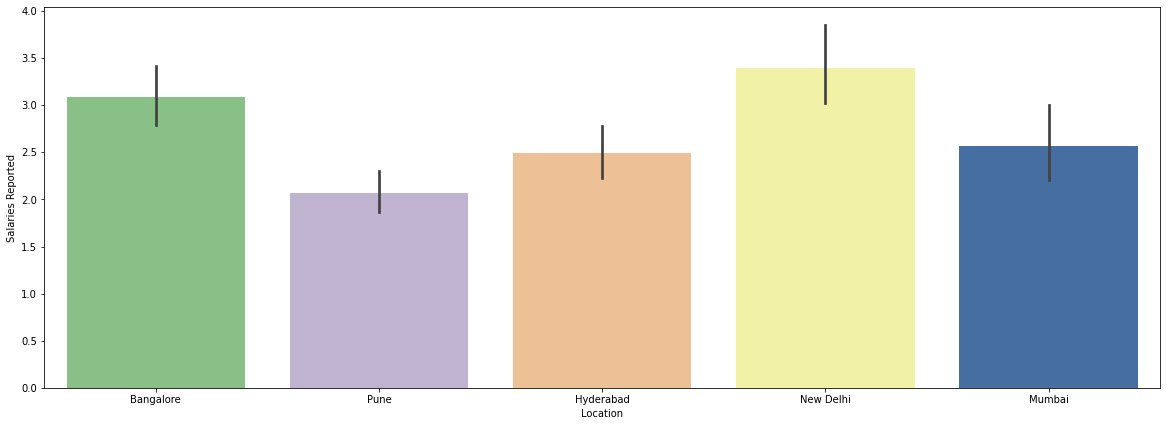

In [34]:
plt.figure(figsize = (20, 7))
sns.barplot(x = salaries_df["Location"], y = salaries_df["Salaries Reported"], palette = "Accent");

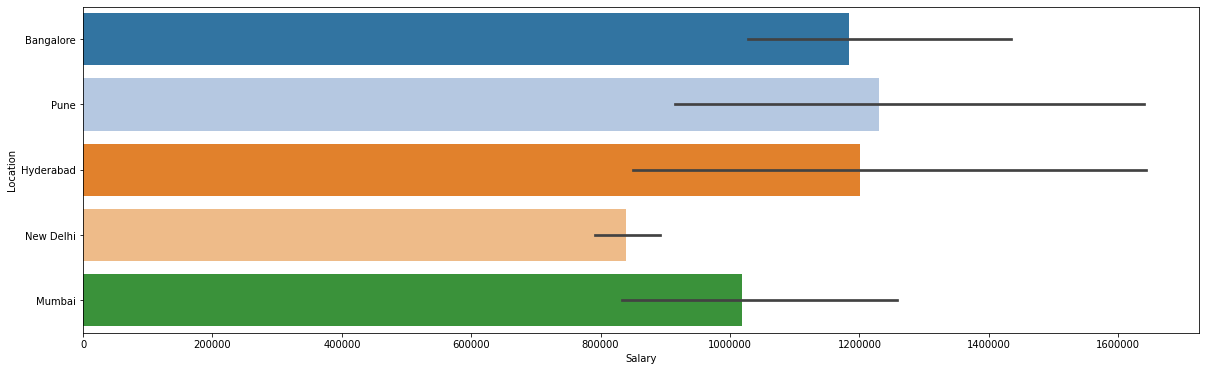

In [35]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = salaries_df["Salary"], y = salaries_df["Location"], palette = "tab20");

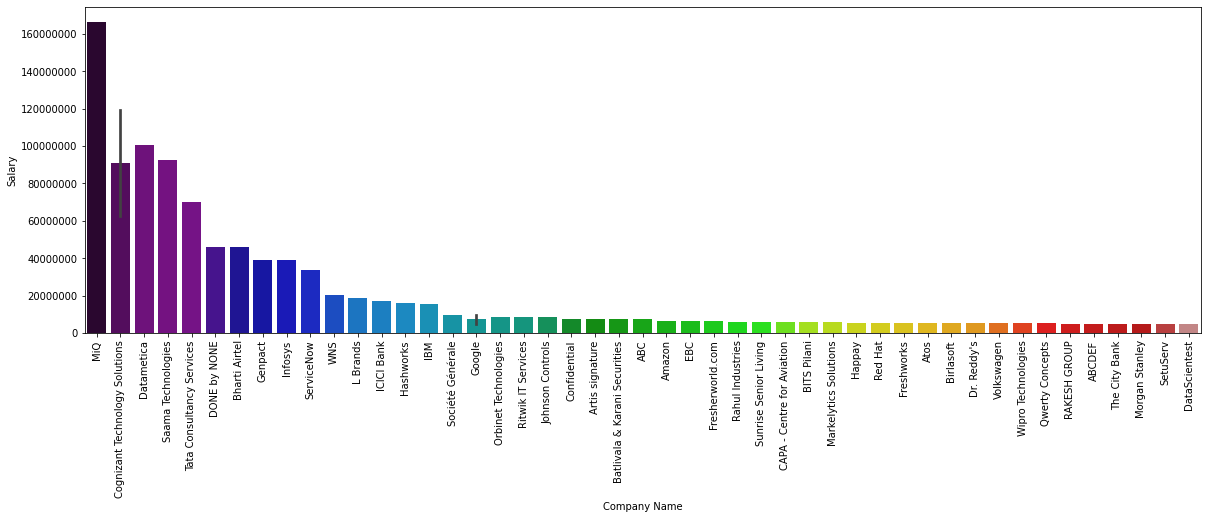

In [37]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
salaries_df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = salaries_df["Company Name"][:50], y = salaries_df["Salary"][:50], palette = "nipy_spectral");

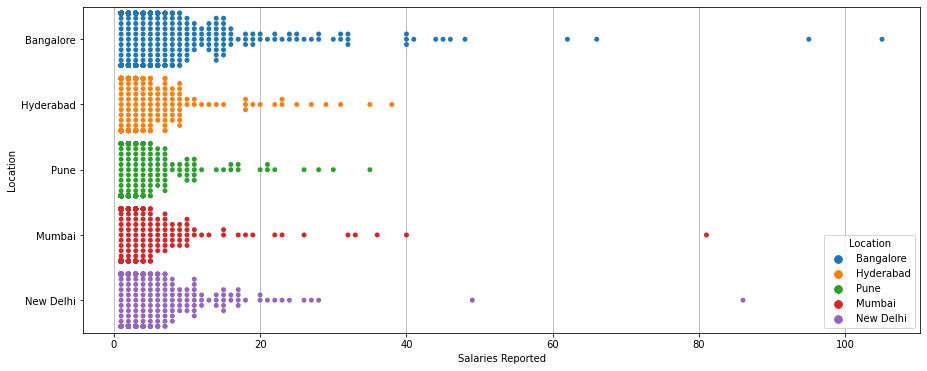

In [38]:
plt.figure(figsize = (15, 6))
plt.grid()
sns.swarmplot(salaries_df["Salaries Reported"], salaries_df["Location"], hue = salaries_df["Location"]);

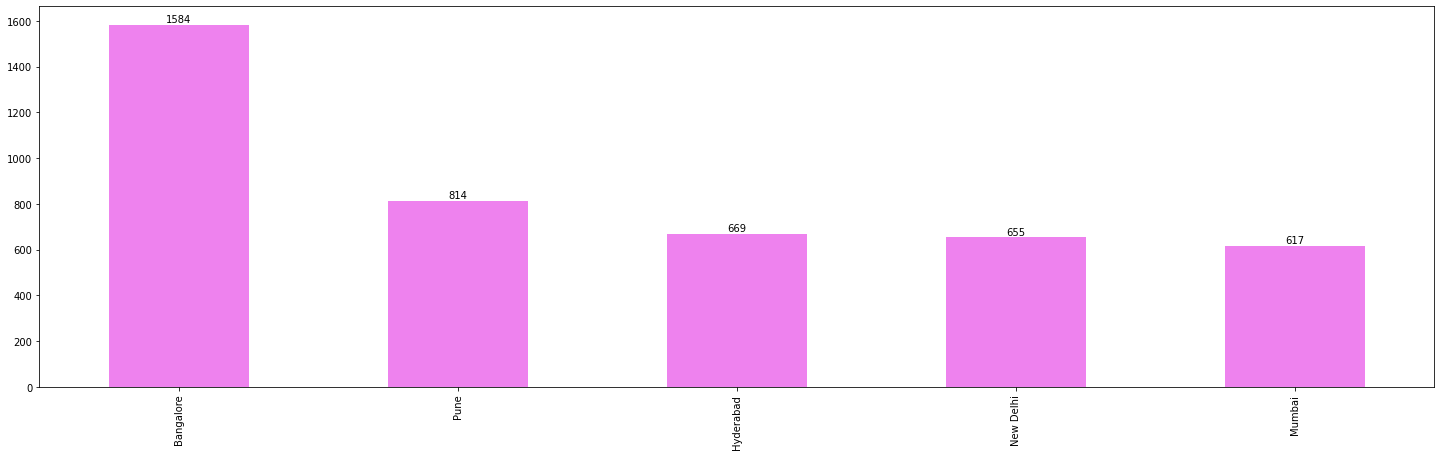

In [40]:
plt.figure(figsize = (25, 7))
ax = salaries_df.Location.value_counts()[:25].plot(kind = 'bar', color = 'violet')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

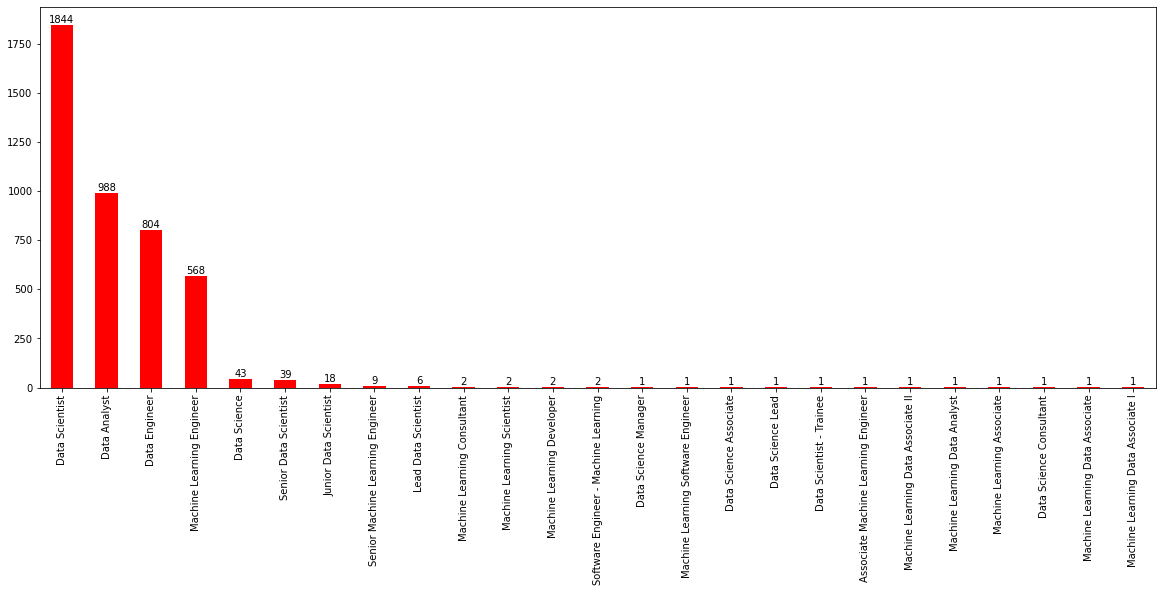

In [41]:
plt.figure(figsize = (20, 7))
ax = salaries_df["Job Title"].value_counts().plot(kind = 'bar', color = "red")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

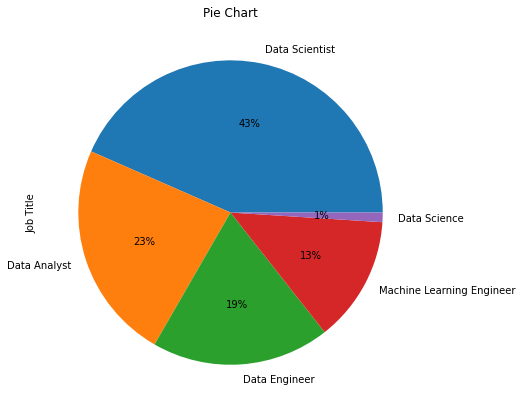

In [42]:
salaries_df["Job Title"].value_counts()[:5].plot.pie(figsize = (7, 7), autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

In [43]:
salaries_df["Company Name"].value_counts()[:10]

Tata Consultancy Services         41
Amazon                            31
Accenture                         30
Google                            27
Fresher                           26
IBM                               26
First Student                     25
Infosys                           23
Cognizant Technology Solutions    21
DONE by NONE                      21
Name: Company Name, dtype: int64

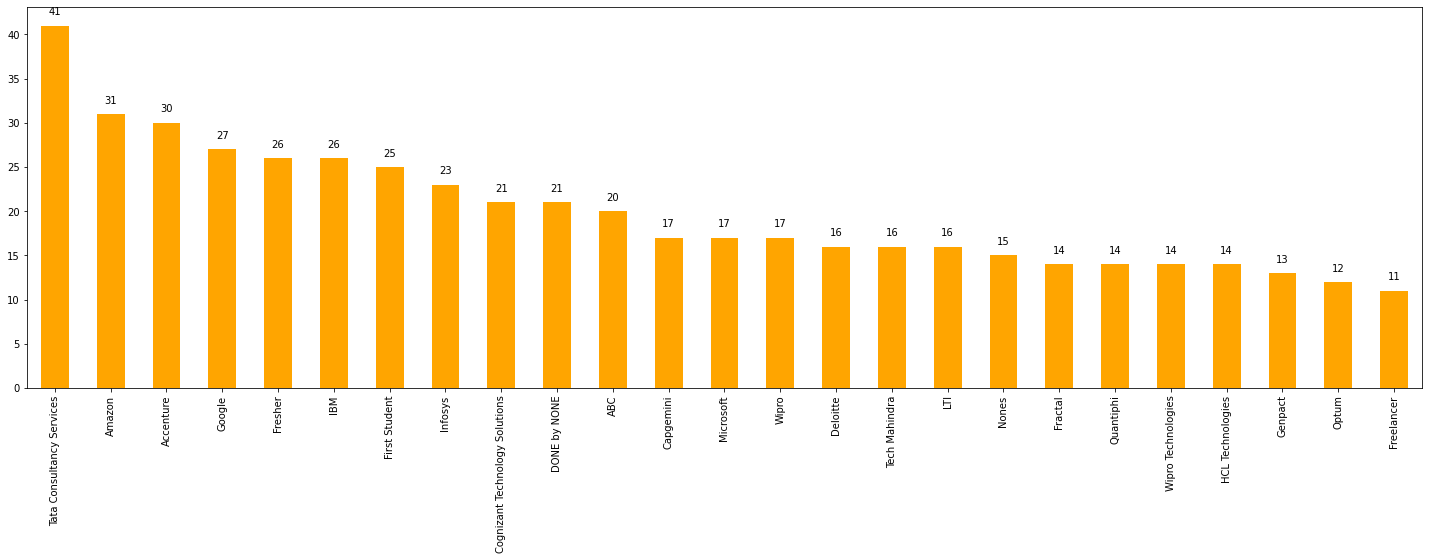

In [44]:
plt.figure(figsize = (25, 7))
ax = salaries_df["Company Name"].value_counts()[:25].plot(kind = 'bar', color = "orange")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

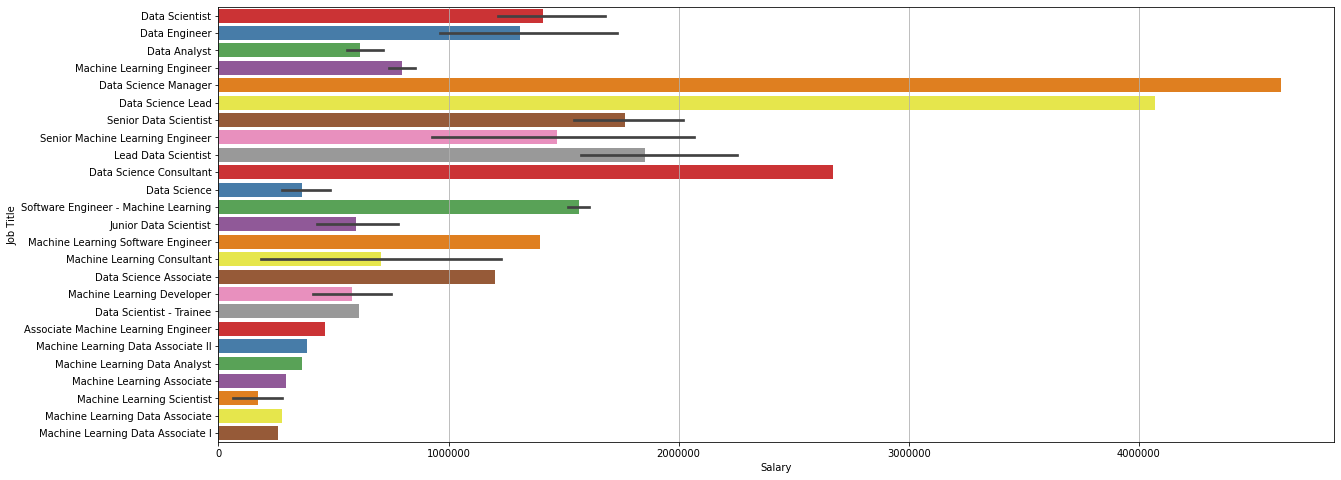

In [45]:
plt.figure(figsize = (20, 8))
plt.grid()
plt.ticklabel_format(style = 'plain')
salaries_df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = salaries_df["Salary"], y = salaries_df["Job Title"], palette = "Set1");

In [46]:
fig = px.scatter(salaries_df, x = "Salary", y = "Company Name", color = "Job Title")
fig.show()

In [47]:
salaries_df.sort_values("Salaries Reported", axis = 0, ascending = False, inplace = True)
salaries_df["Salaries Reported"]

0       105
1        95
2548     86
4245     81
2        66
       ... 
591       1
3532      1
3930      1
3805      1
2471      1
Name: Salaries Reported, Length: 4339, dtype: int64

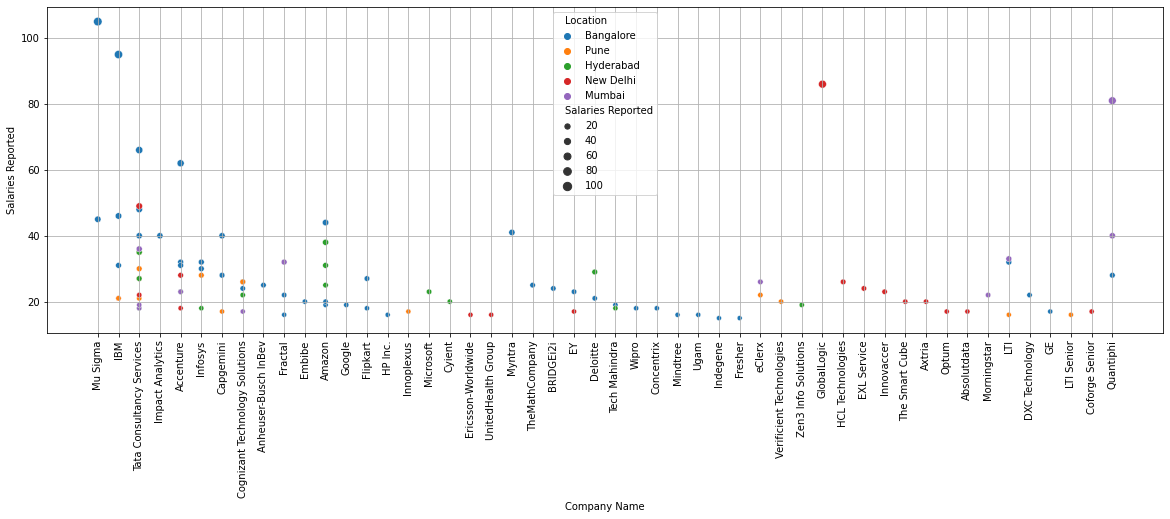

In [48]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
ax = sns.scatterplot(salaries_df["Company Name"][:100], salaries_df["Salaries Reported"][:100], hue = salaries_df["Location"], size = salaries_df["Salaries Reported"]);

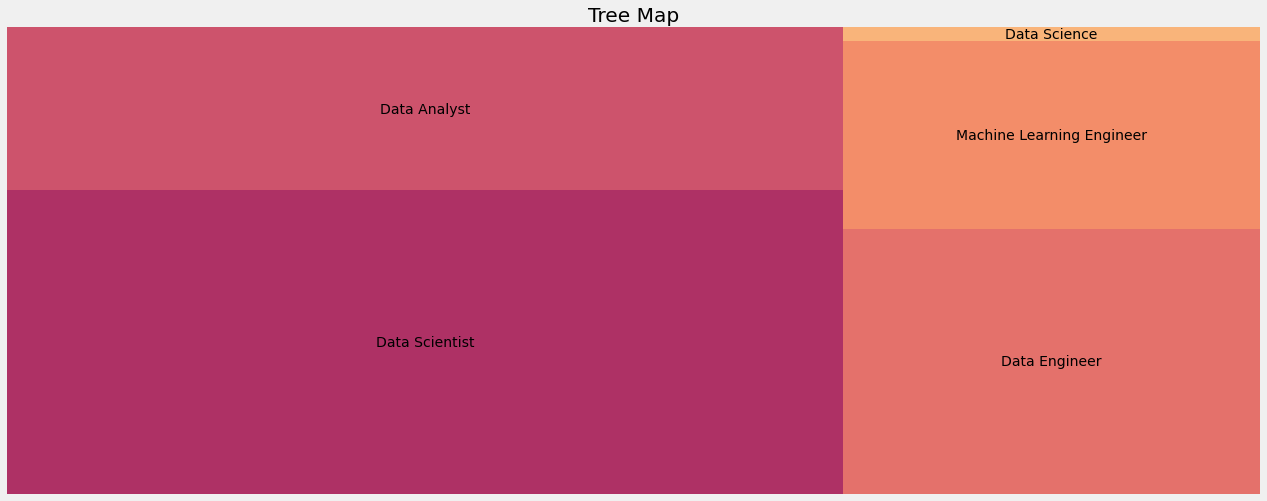

In [49]:
y = salaries_df["Job Title"].value_counts()[:5]
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use("fivethirtyeight")
color = plt.cm.Spectral(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()

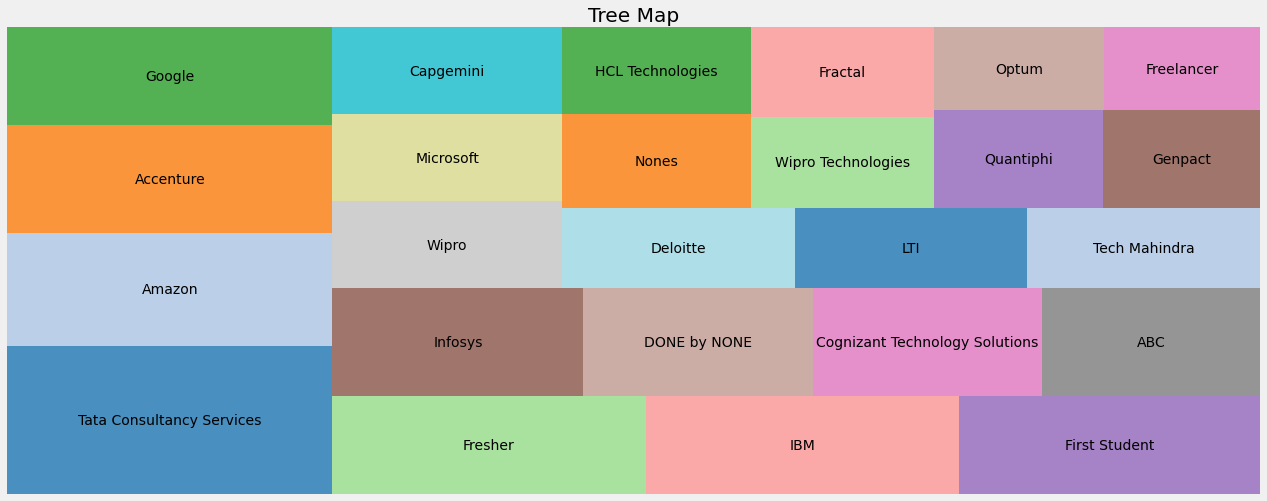

In [50]:
y = salaries_df["Company Name"].value_counts()[:25]
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use("fivethirtyeight")
color = plt.cm.tab20(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()